In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """
Using TensorFlow backend.


In [2]:
os.chdir('augmented data\\yes')
X = []
y = []
for i in tqdm(os.listdir()):
    #print(i)
    img = cv2.imread(i)   
    img = cv2.resize(img,(240,240))
    X.append(img)
    y.append('Y')
os.chdir('augmented data\\no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(240,240))
      X.append(img)
for i in range(0,979):
    y.append('N')

In [3]:
len(y)

2064

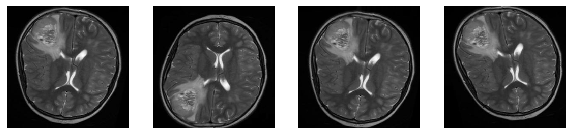

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print ("X_train: ", X_train[0].shape)
print ("X_test: ", X_test[0].shape)

X_train:  (240, 240, 3)
X_test:  (240, 240, 3)


In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [7]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1444, 240, 240, 3)
X_test Shape:  (620, 240, 240, 3)
y_train Shape:  (1444, 2)
y_test Shape:  (620, 2)


In [8]:
model=Sequential()
model.add(BatchNormalization(input_shape = (240,240,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (240,240, 3))) 
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25))
model.add(Flatten()) 

model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

In [9]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
history = model.fit(X_train,y_train,
                    epochs=40, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Train on 1444 samples, validate on 620 samples
Epoch 1/40
1444/1444 [==============================] - 163s 113ms/step - loss: 0.6461 - accuracy: 0.6496 - val_loss: 0.5443 - val_accuracy: 0.7484
Epoch 2/40
1444/1444 [==============================] - 161s 112ms/step - loss: 0.5375 - accuracy: 0.7583 - val_loss: 0.5150 - val_accuracy: 0.7645
Epoch 3/40
1444/1444 [==============================] - 160s 111ms/step - loss: 0.4812 - accuracy: 0.7902 - val_loss: 0.4791 - val_accuracy: 0.7806
Epoch 4/40
1444/1444 [==============================] - 160s 111ms/step - loss: 0.4531 - accuracy: 0.7929 - val_loss: 0.4291 - val_accuracy: 0.8097
Epoch 5/40
1444/1444 [==============================] - 159s 110ms/step - loss: 0.4203 - accuracy: 0.8019 - val_loss: 0.4508 - val_accuracy: 0.8290
Epoch 6/40
1444/1444 [==============================] - 160s 111ms/step - loss: 0.3615 - accuracy: 0.8470 - val_loss: 0.5845 - val_accuracy: 0.7226
Epoch 7/40
1444/1444 [==============================] - 158s 109m

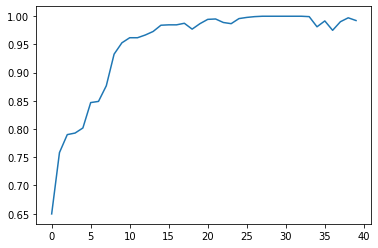

In [11]:
plt.plot(history.history['accuracy'])

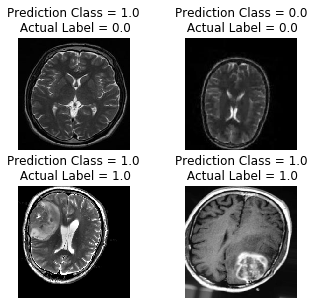

In [12]:
y_predicted=model.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (5,5))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       299
           1       0.83      0.90      0.87       321

    accuracy                           0.85       620
   macro avg       0.86      0.85      0.85       620
weighted avg       0.86      0.85      0.85       620

